<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

# Artificial Intelligence in Finance

## Superintelligence

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [18]:
import gym
import numpy as np
import pandas as pd
np.random.seed(100)

In [19]:
env = gym.make('CartPole-v1')

In [20]:
env.reset(seed=100)

(array([ 0.03349816,  0.0096554 , -0.02111368, -0.04570484], dtype=float32),
 {})

In [21]:
action_size = env.action_space.n
action_size

2

In [22]:
[env.action_space.sample() for _ in range(10)]

[0, 1, 0, 0, 1, 1, 0, 0, 1, 1]

In [23]:
state_size = env.observation_space.shape[0]
state_size

4

In [25]:
state = env.reset(seed=100)
state  # [cart position, cart velocity, pole angle, pole angular velocity]

(array([ 0.03349816,  0.0096554 , -0.02111368, -0.04570484], dtype=float32),
 {})

In [27]:
state, reward, done, _, _ = env.step(env.action_space.sample())
state, reward, done, _

(array([ 0.03779274,  0.01027186, -0.02892725, -0.05931769], dtype=float32),
 1.0,
 False,
 {})

In [34]:
%%time
data = pd.DataFrame()
state = env.reset()
length = []
for run in range(25000):
    done = False
    prev_state, _ = env.reset()
    treward = 1
    results = []
    while not done:
        action = env.action_space.sample()
        state, reward, done, _, _ = env.step(action)
        results.append({'s1': prev_state[0], 's2': prev_state[1],
                        's3': prev_state[2], 's4': prev_state[3],
                        'a': action, 'r': reward})
        treward += reward if not done else 0
        prev_state = state
    if treward >= 110:
        data = pd.concat([data, pd.DataFrame(results)])
        length.append(treward)

CPU times: user 4.23 s, sys: 56.2 ms, total: 4.28 s
Wall time: 4.35 s


In [35]:
np.array(length).mean()

116.8

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 0 to 112
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      584 non-null    float32
 1   s2      584 non-null    float32
 2   s3      584 non-null    float32
 3   s4      584 non-null    float32
 4   a       584 non-null    int64  
 5   r       584 non-null    float64
dtypes: float32(4), float64(1), int64(1)
memory usage: 22.8 KB


In [37]:
data.tail()

,s1,s2,s3,s4,a,r
108,-0.424366,-0.293430,-0.145489,-0.514591,1,1.0
109,-0.430235,-0.096591,-0.155781,-0.849353,0,1.0
110,-0.432167,-0.289285,-0.172768,-0.609428,1,1.0
111,-0.437952,-0.092222,-0.184956,-0.951162,0,1.0
112,-0.439797,-0.284439,-0.203980,-0.721823,0,1.0


In [38]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [42]:
from pylab import plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [43]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(100)

In [44]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [45]:
from keras.layers import Dense
from keras.models import Sequential

In [46]:
model = Sequential()
model.add(Dense(64, activation='relu',
                input_dim=env.observation_space.shape[0]))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [47]:
%%time
model.fit(data[['s1', 's2', 's3', 's4']], data['a'],
          epochs=25, verbose=False, validation_split=0.2)

CPU times: user 381 ms, sys: 142 ms, total: 523 ms
Wall time: 693 ms


/Users/wuxiaomin/opt/anaconda3/envs/dataspell/lib/python3.10/site-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


In [48]:
res = pd.DataFrame(model.history.history)
res.tail(3)

,loss,acc,val_loss,val_acc
22,0.620499,0.670236,0.684242,0.589744
23,0.619554,0.668094,0.684743,0.589744
24,0.618884,0.668094,0.683770,0.589744


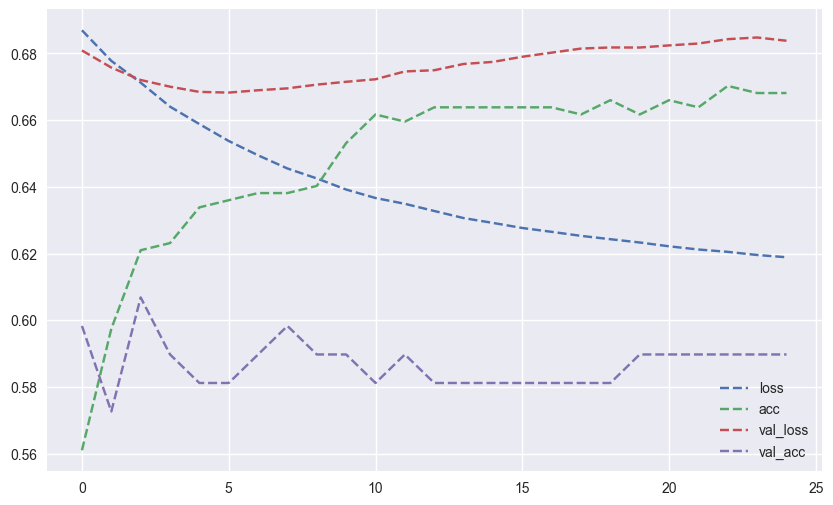

In [49]:
res.plot(figsize=(10, 6), style='--');

In [54]:
def epoch():
    print('|', end='')
    done = False
    state, _ = env.reset()
    treward = 1
    while not done:
        action = np.where(model.predict(np.atleast_2d(state))[0][0] > 0.5, 1, 0)
        state, reward, done, _, _ = env.step(action)
        treward += reward if not done else 0
    return treward

In [55]:
epoch()

|

181.0

In [56]:
%%time
res = np.array([epoch() for _ in range(100)])
print()
res

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CPU times: user 14.9 s, sys: 1.48 s, total: 16.3 s
Wall time: 14.1 s


array([ 132.,  662.,  833.,  368.,  441.,  191.,  377.,  210.,  652.,
        506.,  288.,  418.,  366.,  638.,  383.,  826.,  464.,  148.,
        155.,  217.,  392.,  527.,  472.,  418.,  395., 1032.,  998.,
        539.,  301.,  363.,  370.,  626.,  260.,  250.,  870.,  505.,
        244.,  546.,  638.,  518.,  149.,  205.,  140.,  466.,  346.,
        170.,  160.,  532.,  191.,  622.,  231.,  399.,  443.,  142.,
        514.,  197.,  165.,  390.,  300.,  337.,  394.,  211.,  183.,
        441.,  430.,  208.,  253.,  392.,  322.,  310.,  193.,  470.,
        474., 1519.,  504.,  628.,  477.,  177.,  436.,  210.,  616.,
        616.,  163.,  328.,  179.,  152.,  143.,  202.,  156.,  140.,
        218.,  150.,  142.,  226.,  178.,  436.,  237.,  730.,  379.,
        167.])

In [57]:
res.mean()

384.28

<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>